# Workshop: Convolution
Convolution, Kernel, Pooling

# Convolution

In [1]:
import torch 
import torch.nn as nn

In [2]:
input = torch.randn(20, 3, 256, 256)


m = nn.Conv2d(in_channels=3, out_channels=28, kernel_size=3, stride=1,padding=0)
output = m(input)


print(input.shape)
print(output.shape)

torch.Size([20, 3, 256, 256])
torch.Size([20, 28, 254, 254])


In [3]:
m.state_dict()['weight'].shape

torch.Size([28, 3, 3, 3])

In [4]:
m.state_dict()['bias'].shape

torch.Size([28])

In [5]:
pool2d = nn.MaxPool2d(kernel_size=3,stride=2)

output = pool2d(input)

output.shape

torch.Size([20, 3, 127, 127])

## Read image

In [7]:
# Conda
import numpy as np
from PIL import Image, ImageOps

imgfile = 'building1.jpg'     #  input image

image = Image.open(imgfile)#.convert('L')  # convert to grayscale


## Kernel

In [8]:
kernel1 = np.array([[-1, 0, 1], # v
                    [-3, 0, 3],
                    [-1, 0, 1]])

In [51]:
kernel2 = np.array([[-1,-3, -1], # h
                    [0,  0,  0],
                    [1,  3,  1]])

In [52]:
kernel3 = np.array([[0,  1,  3], # \
                    [-1, 0, 1],
                    [-3,-1,  0]])

In [53]:
kernel4 = np.array([[-3, -1, 0], # /
                    [-1,  0, 1],
                    [0,  1, 3]])

In [54]:
kernel5 = np.array([[-1, -1, -1], # edge
                    [-1, 8, -1],
                    [-1, -1, -1]])

## Convolution2D  Example

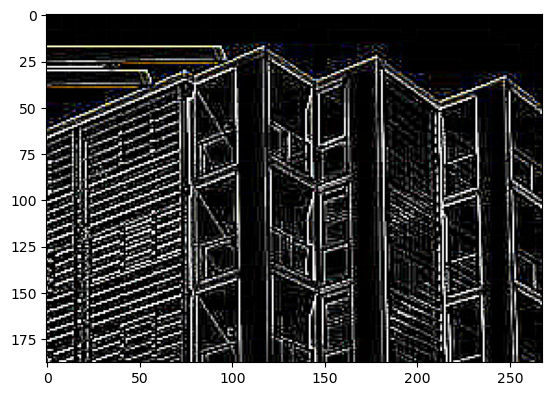

In [55]:
import cv2
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

pixel = np.array(image)
fea_map = cv2.filter2D(src=pixel, ddepth=-1, kernel=kernel1)  # Feature Map

# use Matplot lib
plt.imshow(fea_map)
plt.show()

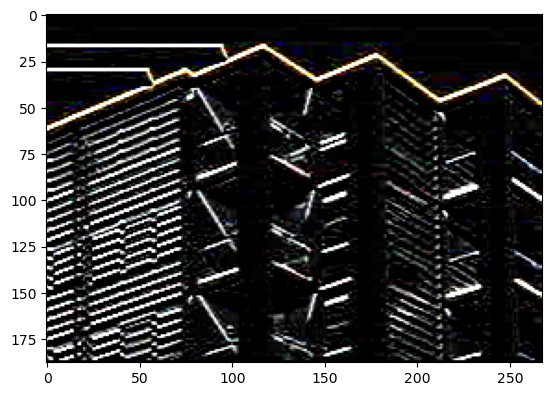

In [56]:
pixel = np.array(image)
fea_map = cv2.filter2D(src=pixel, ddepth=-1, kernel=kernel2)  # Feature Map

# use Matplot lib
plt.imshow(fea_map)
plt.show()

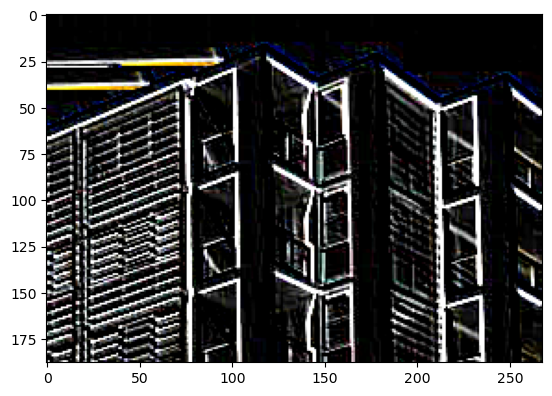

In [57]:
pixel = np.array(image)
fea_map = cv2.filter2D(src=pixel, ddepth=-1, kernel=kernel3)  # Feature Map

# use Matplot lib
plt.imshow(fea_map)
plt.show()

# MaxPool2d

In [8]:
pixel = torch.from_numpy(np.array(image,np.float32))

pixel.shape


torch.Size([188, 268, 3])

In [9]:
pixel = pixel.permute(2,0,1).unsqueeze(0)

pixel.shape

torch.Size([1, 3, 188, 268])

In [10]:
pool2d = nn.MaxPool2d(kernel_size=3,stride=2)

output = pool2d(pixel)

output.shape


torch.Size([1, 3, 93, 133])

In [11]:
ximage = output.squeeze(0).permute(1,2,0).numpy()  # ลบ dimension ที่มีขนาดเท่ากับ 1
ximage.shape

(93, 133, 3)

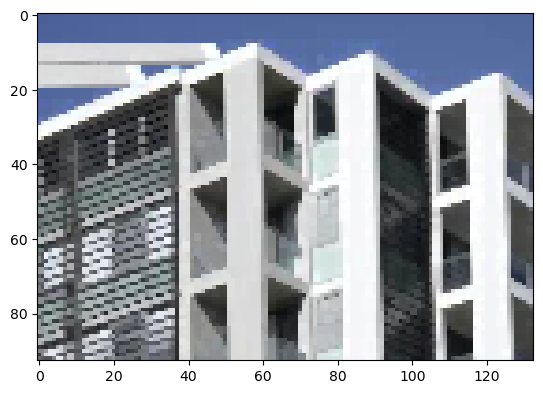

In [41]:
plt.imshow(ximage/255.0)
plt.show()

# Play With image

In [3]:
# Alexnet conv2d
import torch
import torch.nn as nn



In [71]:
image = Image.open(imgfile)
pixel = torch.from_numpy(np.array(image,np.float32)).permute(2,0,1).unsqueeze(0)

pixel.shape

torch.Size([1, 3, 188, 268])

In [75]:
m = torch.nn.Sequential(
            torch.nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2), 
            torch.nn.Conv2d(32, 3, kernel_size=3, stride=1, padding=1) 
            )
            

In [76]:
out = m(pixel)
out.shape

torch.Size([1, 3, 94, 134])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


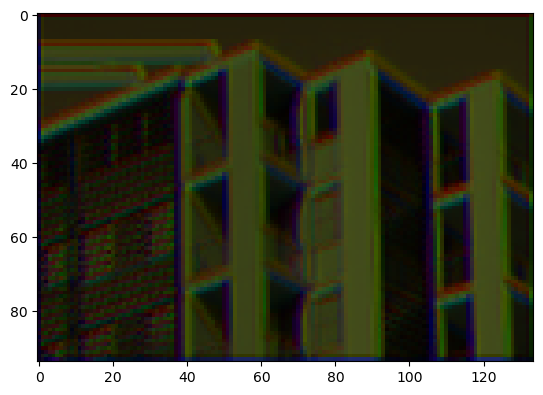

In [78]:
ximage = out.squeeze(0).permute(1,2,0).detach().numpy() 
plt.imshow(ximage/255.0)
plt.show()

In [ ]:
#makegrid  image pytorch

